In [4]:
import numpy as np
import sklearn.neighbors
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble
import sklearn.naive_bayes
import pandas as pd
import seaborn as sns 
import torch
import matplotlib.pyplot as plt

In [5]:
def gbTest(feat, n_est):
    avg = 0
    iter = 50
    for i in range(iter):
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(feat, labels, test_size=0.33, random_state=i)
        y_test = np.ravel(y_test)
        y_train = np.ravel(y_train)

        gb = sklearn.ensemble.GradientBoostingClassifier(n_estimators=n_est)
        gb.fit(X_train, y_train)
        gb_score = gb.score(X_test, y_test)
        avg += gb_score 
    avg = avg/iter
    return avg


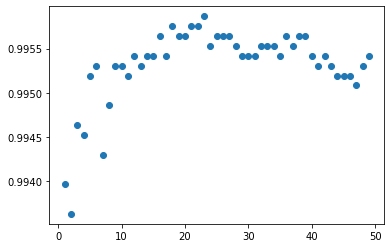

In [7]:
# All Features
data = pd.read_pickle("data.pkl")

feat = data[["Kur_ECR", "Kur_FCU", "Skew_ECR", "Skew_FCU", "SSC_ECR", "SSC_FCU", "WA_ECR", "WA_FCU", "WL_ECR", "WL_FCU", "SD_ECR", "SD_FCU", "Zc_ECR", "Zc_FCU", "Mean_ECR", "Mean_FCU","Var_ECR", "Var_FCU"]]
labels = data["Labels"]

results_a = []
for i in range(1, 50):
    results_a.append(gbTest(feat, i))

i = range(1, 50)
fig,ax = plt.subplots()
ax.scatter(i, results_a)

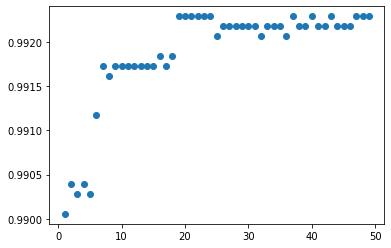

In [8]:
# PCA All Features
pca_a = pd.read_pickle("all_pca.pkl")
feat = pca_a[["Dim1", "Dim2", "Dim3"]]

results_pa = []
for i in range(1, 50):
    results_pa.append(gbTest(feat, i))

i = range(1, 50)
fig,ax = plt.subplots()
ax.scatter(i, results_pa)

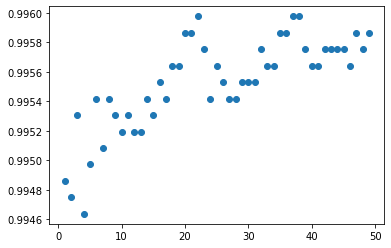

In [9]:
# Subset
feat = data[["SSC_ECR", "WA_FCU", "WL_ECR", "WL_FCU","SD_ECR", "SD_FCU","Mean_ECR", "Mean_FCU", "Var_FCU"]]

results_s = []
for i in range(1, 50):
    results_s.append(gbTest(feat, i))

i = range(1, 50)
fig,ax = plt.subplots()
ax.scatter(i, results_s)

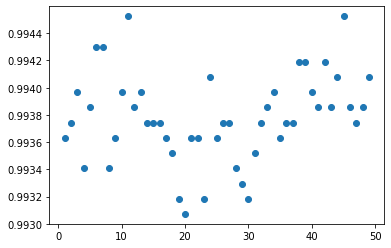

In [11]:
# PCA Subset
pca_s = pd.read_pickle("subs_pca.pkl")
feat = pca_s[["Dim1", "Dim2"]]

results_ps = []
for i in range(1, 50):
    results_ps.append(gbTest(feat, i))

i = range(1, 50)
fig,ax = plt.subplots()
ax.scatter(i, results_ps)

Text(0.5, 0, '# Estimators')

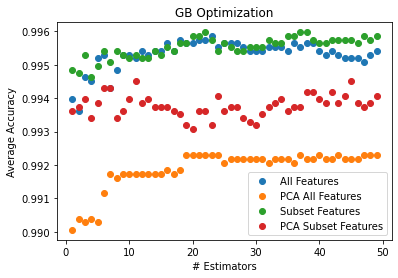

In [12]:
fig,ax = plt.subplots()
ax.scatter(i, results_a, label='All Features')
ax.scatter(i, results_pa, label='PCA All Features')
ax.scatter(i, results_s, label='Subset Features')
ax.scatter(i, results_ps, label='PCA Subset Features')
ax.legend()
ax.set_title("GB Optimization")
ax.set_ylabel("Average Accuracy")
ax.set_xlabel("# Estimators")